In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import*
import seaborn as sns


In [3]:
bid = pd.read_csv("XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv")
ask = pd.read_csv("XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv")     

In [5]:
print(ask.head(3))
print(ask.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.036  24.059  24.017  24.059   0.3480
1  2023.01.02 23:05:00  24.064  24.130  24.064  24.092   1.8458
2  2023.01.02 23:10:00  24.094  24.098  23.972  23.977   0.9030
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.751  22.751  22.746  22.746    0.069
35218  2023.06.30 20:50:00  22.746  22.761  22.736  22.756    0.216
35219  2023.06.30 20:55:00  22.756  22.766  22.701  22.745    0.327


In [7]:
print(bid.head(3))
print(bid.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.102  24.125  24.083  24.125    0.351
1  2023.01.02 23:05:00  24.094  24.188  24.094  24.141    1.155
2  2023.01.02 23:10:00  24.143  24.148  24.022  24.027    0.882
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.781  22.781  22.776  22.776   0.4212
35218  2023.06.30 20:50:00  22.776  22.797  22.774  22.786   0.6836
35219  2023.06.30 20:55:00  22.786  22.811  22.786  22.811   0.3712


In [9]:
merged_data=bid.merge(ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')
merged_data

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.102,24.125,24.083,24.125,0.3510,24.036,24.059,24.017,24.059,0.3480
1,2023.01.02 23:05:00,24.094,24.188,24.094,24.141,1.1550,24.064,24.130,24.064,24.092,1.8458
2,2023.01.02 23:10:00,24.143,24.148,24.022,24.027,0.8820,24.094,24.098,23.972,23.977,0.9030
3,2023.01.02 23:15:00,24.026,24.028,23.986,24.028,0.8940,23.977,23.980,23.938,23.980,0.8940
4,2023.01.02 23:20:00,24.026,24.073,24.023,24.073,0.9044,23.978,24.024,23.976,24.023,0.8880
...,...,...,...,...,...,...,...,...,...,...,...
35215,2023.06.30 20:35:00,22.782,22.782,22.771,22.776,1.8002,22.752,22.752,22.741,22.746,0.2752
35216,2023.06.30 20:40:00,22.775,22.781,22.775,22.776,0.7568,22.736,22.751,22.736,22.746,0.1410
35217,2023.06.30 20:45:00,22.781,22.781,22.776,22.776,0.4212,22.751,22.751,22.746,22.746,0.0690
35218,2023.06.30 20:50:00,22.776,22.797,22.774,22.786,0.6836,22.746,22.761,22.736,22.756,0.2160


In [15]:

merged_data.columns = ['time', 'open_bid', 'high_bid', 'low_bid', 'close_bid', 'volume_bid', 'open_ask', 'high_ask', 'low_ask', 'close_ask', 'volume_ask']

In [17]:
merged_data.head()

,time,open_bid,high_bid,low_bid,close_bid,volume_bid,open_ask,high_ask,low_ask,close_ask,volume_ask
0,2023.01.02 23:00:00,24.102,24.125,24.083,24.125,0.3510,24.036,24.059,24.017,24.059,0.3480
1,2023.01.02 23:05:00,24.094,24.188,24.094,24.141,1.1550,24.064,24.130,24.064,24.092,1.8458
2,2023.01.02 23:10:00,24.143,24.148,24.022,24.027,0.8820,24.094,24.098,23.972,23.977,0.9030
3,2023.01.02 23:15:00,24.026,24.028,23.986,24.028,0.8940,23.977,23.980,23.938,23.980,0.8940
4,2023.01.02 23:20:00,24.026,24.073,24.023,24.073,0.9044,23.978,24.024,23.976,24.023,0.8880


In [23]:
file_obj2 = open('merged_data.csv', 'w')
merged_data.to_csv('merged_data.csv', encoding='utf-8', index=False)
file_obj2.close()

In [29]:
new=pd.read_csv('merged_data.csv', low_memory=False, sep=',')

In [31]:
new.describe()
org=new.drop(['open_ask', 'high_ask', 'low_ask', 'close_ask'],axis=1)
org.shape
org.head(3)

,time,open_bid,high_bid,low_bid,close_bid,volume_bid,volume_ask
0,2023.01.02 23:00:00,24.102,24.125,24.083,24.125,0.351,0.3480
1,2023.01.02 23:05:00,24.094,24.188,24.094,24.141,1.155,1.8458
2,2023.01.02 23:10:00,24.143,24.148,24.022,24.027,0.882,0.9030


In [33]:
org['time'] = pd.to_datetime(org['time'])
org.head(3)

,time,open_bid,high_bid,low_bid,close_bid,volume_bid,volume_ask
0,2023-01-02 23:00:00,24.102,24.125,24.083,24.125,0.351,0.3480
1,2023-01-02 23:05:00,24.094,24.188,24.094,24.141,1.155,1.8458
2,2023-01-02 23:10:00,24.143,24.148,24.022,24.027,0.882,0.9030


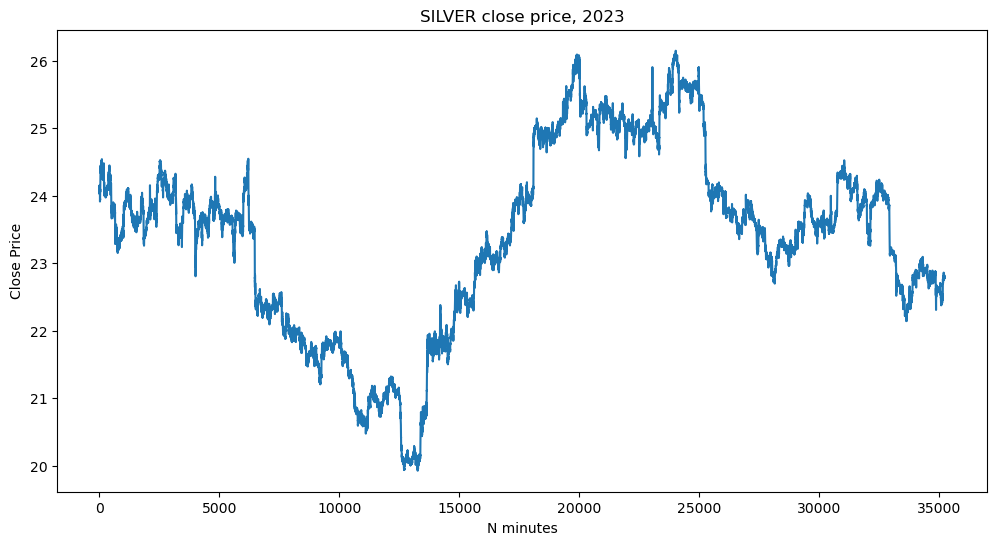

In [35]:
plt.figure(figsize=(12,6))
plt.plot(org['close_bid'])
plt.title('SILVER close price, 2023')
plt.xlabel('N minutes')
plt.ylabel('Close Price')
plt.show()

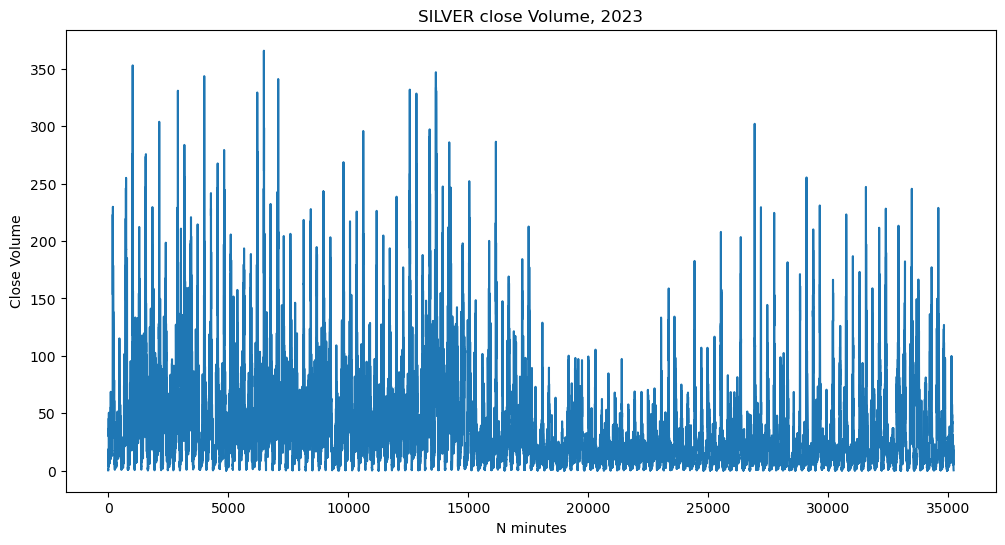

In [37]:
plt.figure(figsize=(12,6))
plt.plot(org['volume_bid'])
plt.title('SILVER close Volume, 2023')
plt.xlabel('N minutes')
plt.ylabel('Close Volume')
plt.show()

C:\Users\ccs\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0419 - mae: 0.0821 - val_loss: 5.9854e-06 - val_mae: 0.0019
Epoch 2/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.6062e-06 - mae: 0.0016 - val_loss: 4.1247e-06 - val_mae: 0.0015
Epoch 3/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.5669e-06 - mae: 0.0016 - val_loss: 4.1198e-06 - val_mae: 0.0015
Epoch 4/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.2368e-06 - mae: 0.0015 - val_loss: 4.2385e-06 - val_mae: 0.0015
Epoch 5/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4.5749e-06 - mae: 0.0016 - val_loss: 5.4283e-06 - val_mae: 0.0018
Epoch 6/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.0303e-06 - mae: 0.0015 - val_loss: 4.7982e-06 - val_mae: 0.0017
Epoch 7/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.5479e-06 - mae: 0.0016 - val_loss: 3.9597e-06 - val_mae: 0.0014
Epoch 8/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.4723e-06 - mae: 0.0016 - val_loss: 3.3762e-06 - val_mae: 0.0

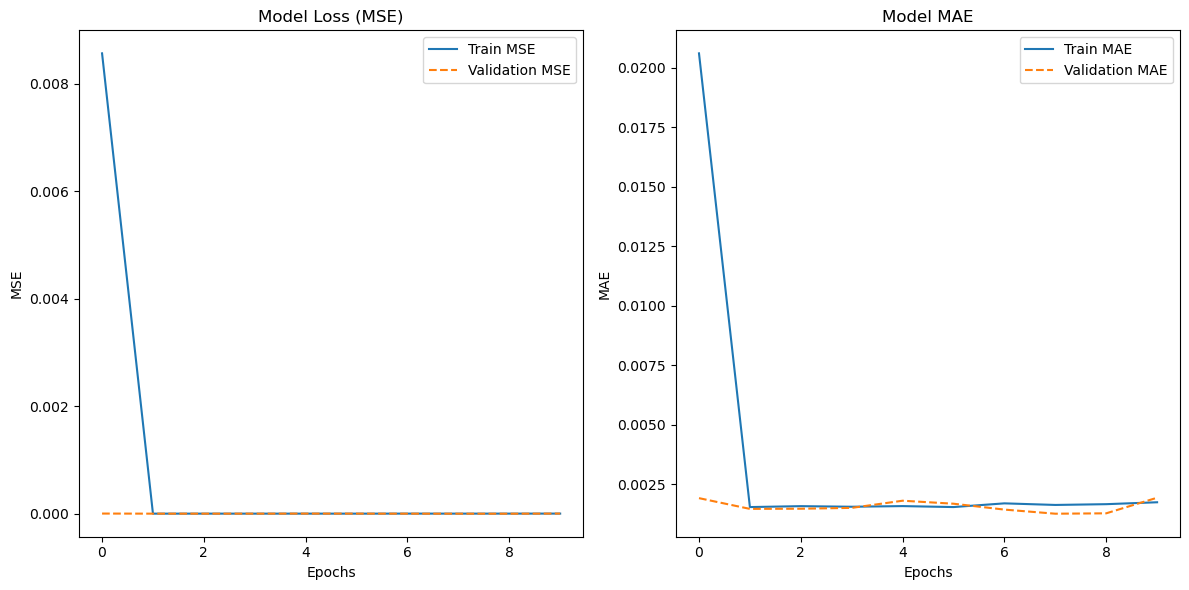

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Added import
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

# Assuming 'org' is your dataset

# Normalize the selected columns
scaler = MinMaxScaler()

columns_to_normalize = ['open_bid', 'high_bid', 'low_bid', 'close_bid', 'volume_bid', 'volume_ask']
org[columns_to_normalize] = scaler.fit_transform(org[columns_to_normalize])

# Shifting the 'high_bid' and 'low_bid' columns as an example
org['high_bid_shifted_next'] = org['high_bid'].shift(-1)  # Shift by 1 for next value
org['low_bid_shifted_next'] = org['low_bid'].shift(-1)

# Drop the last row as the shifted column will have NaN value
org = org.dropna()

# Separate the input (X) and output (y) matrices
X = org[['open_bid', 'high_bid', 'low_bid', 'volume_bid', 'volume_ask', 'high_bid_shifted_next', 'low_bid_shifted_next']].values
y = org['close_bid'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP model
model = Sequential()

# Add Dense layers (MLP layers)
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Input layer
model.add(Dense(units=32, activation='relu'))  # Hidden layer
model.add(Dense(units=1))  # Output layer for regression (single value prediction)

# Compile the model with MSE loss and MAE as metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Get the final MSE and MAE values
final_mse = history.history['loss'][-1]
final_mae = history.history['mae'][-1]

print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

# Plotting the loss (MSE) and MAE over epochs
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE', linestyle='--')
plt.title('Model Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE', linestyle='--')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()